# Importing Data

In [35]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/BT4222 Data Mining/Code & Data/cleaned_data_with_geo.csv', na_filter=False)
data.drop(['Unnamed: 0', 'property_type', 'latitude', 'longitude', 'X', 'id'], axis=1, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
pd.set_option('display.max_columns', None)
data.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,room_type,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,availability_30,number_of_reviews,review_scores_rating,instant_bookable,reviews_per_month,state,has_license,bathrooms,bathroom_type,num_of_amenities,essentials,luxury,appliances,comfort,entertainment,security,furniture,miscellaneous,host_gender,description_sentiment,neighborhood_overview_sentiment,sentiment_median_score,num_mall_within_500,num_mall_within_1000,num_mall_within_1500,num_mall_within_2000,num_attraction_within_500,num_attraction_within_1000,num_attraction_within_1500,num_attraction_within_2000,mall_within_500,mall_within_1000,mall_within_1500,mall_within_2000,attraction_within_500,attraction_within_1000,attraction_within_1500,attraction_within_2000
0,within an hour,extremely responsive,low,0,1,Entire home/apt,8,2,3,225.0,4,365,0,88,4.7 to 4.8,0,0.59,San Diego,0,2.0,baths,21,2,2,3,1,2,2,0,9,male,Slightly Positive,NA,0.9451,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0
1,within an hour,extremely responsive,average,0,1,Private room,1,1,1,113.0,1,21,20,149,4.3 to 4.4,0,1.02,San Diego,0,1.0,shared,29,4,3,2,2,2,2,1,13,female,Slightly Positive,Slightly Positive,0.9162,0,1,5,8,0,0,0,0,0,1,1,1,0,0,0,0
2,within an hour,extremely responsive,extremely high,1,1,Entire home/apt,7,1,5,258.0,6,365,0,162,4.7 to 4.8,1,1.20,San Diego,0,2.5,baths,41,2,4,8,1,1,3,1,21,female,Neutral,Slightly Positive,0.9245,0,1,2,2,0,0,0,0,0,1,1,1,0,0,0,0
3,within an hour,extremely responsive,extremely high,1,1,Entire home/apt,8,1,6,336.0,6,90,16,183,4.7 to 4.8,1,1.38,San Diego,0,2.0,baths,52,4,5,8,1,2,3,3,26,female,Slightly Positive,Neutral,0.9302,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0
4,within an hour,extremely responsive,high,1,1,Entire home/apt,3,2,3,333.0,5,120,6,296,4.9 to 5.0,0,2.08,San Diego,0,1.0,bath,59,6,3,7,1,2,2,2,36,female,Neutral,Slightly Positive,0.9569,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
data.dtypes

host_response_time                  object
host_response_rate                  object
host_acceptance_rate                object
host_is_superhost                    int64
host_identity_verified               int64
room_type                           object
accommodates                         int64
bedrooms                             int64
beds                                 int64
price                              float64
minimum_nights                       int64
maximum_nights                       int64
availability_30                      int64
number_of_reviews                    int64
review_scores_rating                object
instant_bookable                     int64
reviews_per_month                  float64
state                               object
has_license                          int64
bathrooms                          float64
bathroom_type                       object
num_of_amenities                     int64
essentials                           int64
luxury     

As the pre-processing steps for the neural net would involve one-hot encoding, we plot the cardinality to ensure that we do not have features with exceedingly high number of categories.

In [38]:
data[data.select_dtypes('object').columns].nunique().reset_index(name='cardinality')

,index,cardinality
0,host_response_time,5
1,host_response_rate,7
2,host_acceptance_rate,7
3,room_type,4
4,review_scores_rating,34
5,state,8
6,bathroom_type,6
7,host_gender,3
8,description_sentiment,8
9,neighborhood_overview_sentiment,8


# Final Data Pre-Processing

As mentioned from our data exploration, we keep the geospatial data that is most highly correlated with the target variable.

In [40]:
data.drop(['num_mall_within_500', 'num_mall_within_1500',	'num_mall_within_2000', 'num_attraction_within_500', 'num_attraction_within_1500',	'num_attraction_within_2000',	'mall_within_500',	'mall_within_1000',	'mall_within_1500',	'mall_within_2000',	'attraction_within_500',	'attraction_within_1000',	'attraction_within_1500',	'attraction_within_2000'], axis=1, inplace=True)

We obtain the different types of variables within the dataset, as each of them have different pre-processing steps (which will be explained later).

In [41]:
numeric_columns = []
categorical_columns = []
boolean_columns = ['host_is_superhost', 'host_identity_verified', 'has_license', 'instant_bookable']
ordered_columns = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 'description_sentiment', 'neighborhood_overview_sentiment']

column_types = data.dtypes
for i in range(len(column_types)):
  if column_types[i] == 'object' and column_types.index[i] not in ordered_columns:
    categorical_columns.append(column_types.index[i])
  elif column_types.index[i] not in boolean_columns and column_types[i] != 'object':
    numeric_columns.append(column_types.index[i])

print(numeric_columns)
print(categorical_columns)
print(boolean_columns)
print(ordered_columns)

['accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'availability_30', 'number_of_reviews', 'reviews_per_month', 'bathrooms', 'num_of_amenities', 'essentials', 'luxury', 'appliances', 'comfort', 'entertainment', 'security', 'furniture', 'miscellaneous', 'sentiment_median_score', 'num_mall_within_1000', 'num_attraction_within_1000']
['room_type', 'state', 'bathroom_type', 'host_gender']
['host_is_superhost', 'host_identity_verified', 'has_license', 'instant_bookable']
['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'review_scores_rating', 'description_sentiment', 'neighborhood_overview_sentiment']


We split the model with 70% for train, 15% for validation and 15% for test.

In [10]:
from sklearn.model_selection import train_test_split

train, other = train_test_split(data, train_size=0.7)
val, test = train_test_split(other, test_size=0.5)

As mentioned from the data exploration, the target variable contains extreme outliers, and hence we filter for prices that fall within 1.5 × IQR.

In [11]:
q3, q1 = np.percentile(train['price'], [75 ,25])
iqr = q3 - q1
lower_bound = max(q1 - 1.5* iqr, 0)
upper_bound = q3 + 1.5 * iqr
print(lower_bound, upper_bound)

0 546.0


In [12]:
train = train[train['price'] <= 546]
train.reset_index(inplace=True)
X_train = train.drop(['price'], axis=1)
y_train = train['price']

val = val[val['price'] <= 546]
val.reset_index(inplace=True)
X_val = val.drop(['price'], axis=1)
y_val = val['price']

test = test[test['price'] <= 546]
test.reset_index(inplace=True)
X_test = test.drop(['price'], axis=1)
y_test = test['price']

# Pre-Processing for Model Fitting

We identified four categories of features that is contained within our dataset:


1.   Categorical variables: These are variables with no intrinsic ordering to them, and we perform one-hot encoding on them to obtain the one-hot vectors.
2.   Ordinal categorical variables: These are variables with an intrinsic ordering to them (in relation to price). Hence, we use sklearn's OrdinalEncoder to encode them to an integer value.
3.   Numerical variables: We standardise these variables using sklearn's StandardScaler.
4.   Boolean variables: Since these are already encoded into 1 and 0's from our pre-processing files, we keep them as is (OHE would add additional redundant dimensions.





In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder

enc_X_train = pd.DataFrame()
enc_X_val = pd.DataFrame()
enc_X_test = pd.DataFrame()
enc_X_combined_test = pd.DataFrame()

for column in X_train.columns:
  if column in categorical_columns:
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_col_train = enc.fit_transform(X_train[[column]])
    feature_names = enc.get_feature_names_out()
    enc_X_train[feature_names] = pd.DataFrame.sparse.from_spmatrix(enc_col_train, columns=feature_names)

    enc_col_val = enc.transform(X_val[[column]])
    enc_X_val[feature_names] = pd.DataFrame.sparse.from_spmatrix(enc_col_val, columns=feature_names)

    enc_col_test = enc.transform(X_test[[column]])
    enc_X_test[feature_names] = pd.DataFrame.sparse.from_spmatrix(enc_col_test, columns=feature_names)
  elif column in numeric_columns:
    scaler = StandardScaler()
    transformed_col_train = scaler.fit_transform(X_train[[column]])
    enc_X_train[column] = transformed_col_train

    transformed_col_val = scaler.transform(X_val[[column]])
    enc_X_val[column] = transformed_col_val

    transformed_col_test = scaler.transform(X_test[[column]])
    enc_X_test[column] = transformed_col_test
  elif column in boolean_columns:
    enc_X_train[column] = X_train[[column]]
    enc_X_val[column] = X_val[[column]]
    enc_X_test[column] = X_test[[column]]

for column in ordered_columns:
    enc = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
    enc_col_train = enc.fit_transform(X_train[[column]])
    enc_X_train[column] = enc_col_train

    enc_col_val = enc.transform(X_val[[column]])
    enc_X_val[column] = enc_col_val
    
    enc_col_test = enc.transform(X_test[[column]])
    enc_X_test[column] = enc_col_test

In [14]:
enc_X_train.head()

,host_is_superhost,host_identity_verified,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,number_of_reviews,instant_bookable,reviews_per_month,state_Los Angeles,state_Oakland,state_Pacific Grove,state_San Diego,state_San Francisco,state_San Mateo County,state_Santa Clara County,state_Santa Cruz County,has_license,bathrooms,bathroom_type_NA,bathroom_type_bath,bathroom_type_baths,bathroom_type_half-bath,bathroom_type_private,bathroom_type_shared,num_of_amenities,essentials,luxury,appliances,comfort,entertainment,security,furniture,miscellaneous,host_gender_female,host_gender_male,host_gender_unknown,sentiment_median_score,num_mall_within_1000,num_attraction_within_1000,host_response_time,host_response_rate,host_acceptance_rate,review_scores_rating,description_sentiment,neighborhood_overview_sentiment
0,0,1,1.0,0.0,0.0,0.0,-0.694003,-0.609729,-0.714642,0.446458,-0.293620,-0.986260,0.896821,0,0.191112,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.542848,0.0,1.0,0.0,0.0,0.0,0.0,0.304971,1.044829,-0.025041,0.741795,-0.778526,-0.351435,0.744963,1.012895,-0.062553,0.0,0.0,1.0,0.453282,0.568371,-0.289632,4.0,1.0,2.0,26.0,1.0,2.0
1,0,0,1.0,0.0,0.0,0.0,0.941652,0.512859,0.636036,0.446458,-0.714549,-0.986260,-0.532448,0,-0.741672,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.437342,0.0,0.0,1.0,0.0,0.0,0.0,-1.012058,-1.010543,-0.025041,-0.803938,-0.778526,-0.351435,-0.408103,-0.763253,-0.997879,0.0,1.0,0.0,-1.755550,-0.368690,3.188503,0.0,0.0,0.0,31.0,1.0,0.0
2,0,1,0.0,0.0,1.0,0.0,-0.694003,-0.609729,-0.714642,-0.458373,-0.293620,0.993480,-0.400330,0,1.487523,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.777279,0.0,0.0,0.0,0.0,0.0,1.0,0.027702,0.530986,0.708138,0.355361,0.788992,-1.633575,-1.561170,1.012895,-0.179468,0.0,0.0,1.0,0.511717,-0.368690,-0.289632,4.0,1.0,2.0,30.0,1.0,0.0
3,1,1,1.0,0.0,0.0,0.0,0.123825,-0.609729,-0.714642,0.477660,-0.293620,0.543539,-0.508426,0,-0.562493,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.542848,0.0,1.0,0.0,0.0,0.0,0.0,0.928827,1.044829,-0.758220,0.741795,0.788992,-0.351435,-0.408103,1.012895,1.106605,1.0,0.0,0.0,0.581042,-0.368690,-0.289632,4.0,1.0,3.0,30.0,1.0,3.0
4,1,1,1.0,0.0,0.0,0.0,-0.694003,-0.609729,-0.714642,-0.271167,0.869674,-0.986260,-0.496416,0,-0.641542,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-0.542848,0.0,1.0,0.0,0.0,0.0,0.0,1.275414,1.044829,-0.025041,1.128228,0.788992,0.930704,0.744963,1.900969,1.106605,0.0,0.0,1.0,-0.216592,-0.368690,-0.289632,4.0,1.0,1.0,27.0,4.0,2.0


In [ ]:
enc_X_train.shape

(51769, 52)

# Baseline Model

Before performing hyperparameter tuning, we first run a baseline model to check the estimated model performance. We will then run the model again after hyperparameter tuning with the optimal parameters, which will hopefully give us better model performance.

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense, Input, Dropout, BatchNormalization
from keras.constraints import MaxNorm

model1 = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model1.compile(optimizer='adam', 
              loss='mae',
              metrics=['mae', 'mse'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1696      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,729
Trainable params: 1,729
Non-trainable params: 0
_________________________________________________________________


In [46]:
EPOCHS = 50
BATCH_SIZE = 256
STEPS = X_train.shape[0] // BATCH_SIZE

history = model1.fit(
  enc_X_train, y_train,
  validation_data=(enc_X_val, y_val),
  steps_per_epoch = STEPS,
  batch_size = BATCH_SIZE,
  epochs=EPOCHS)

Epoch 1/50
202/202 [==============================] - 1s 4ms/step - loss: 133.8199 - mae: 133.8199 - mse: 30935.9160 - val_loss: 89.6019 - val_mae: 89.6019 - val_mse: 16862.5098
Epoch 2/50
202/202 [==============================] - 1s 3ms/step - loss: 78.6500 - mae: 78.6500 - mse: 12485.3457 - val_loss: 72.8388 - val_mae: 72.8388 - val_mse: 10492.9697
Epoch 3/50
202/202 [==============================] - 1s 3ms/step - loss: 69.7691 - mae: 69.7691 - mse: 9723.0039 - val_loss: 66.4486 - val_mae: 66.4486 - val_mse: 8974.5479
Epoch 4/50
202/202 [==============================] - 1s 3ms/step - loss: 63.7809 - mae: 63.7809 - mse: 8406.3457 - val_loss: 61.7563 - val_mae: 61.7563 - val_mse: 7902.3789
Epoch 5/50
202/202 [==============================] - 1s 2ms/step - loss: 60.0615 - mae: 60.0615 - mse: 7525.0562 - val_loss: 59.6093 - val_mae: 59.6093 - val_mse: 7335.2197
Epoch 6/50
202/202 [==============================] - 1s 3ms/step - loss: 58.5242 - mae: 58.5242 - mse: 7167.1230 - val_loss

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model1.predict(enc_X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2_square = r2_score(y_val, y_pred)
print('\nMAE:', mae)
print('\nMSE:', mse)
print('\nRMSE:', rmse)
print('\nR2 Square', r2_square)

345/345 [==============================] - 0s 1ms/step

MAE: 51.387994154528776

MSE: 5902.036989349362

RMSE: 76.82471600565381

R2 Square 0.5490281200901025


# Log-Price vs Price

As the distribution is still slightly right-skewed, we want to investigate if transforming the target variable using logarithm will actually help to improve our model's predictions.

In [ ]:
log_y_train = np.log(y_train)
log_y_val = np.log(y_val)

In [ ]:
model2 = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model2.compile(optimizer='adam', 
              loss='mae',
              metrics=['mae', 'mse'])

history = model2.fit(
  enc_X_train, log_y_train,
  validation_data=(enc_X_val, log_y_val),
  steps_per_epoch = STEPS,
  batch_size = BATCH_SIZE,
  epochs=EPOCHS)

Epoch 1/50
202/202 [==============================] - 1s 4ms/step - loss: 0.6791 - mae: 0.6791 - mse: 1.1885 - val_loss: 0.3998 - val_mae: 0.3998 - val_mse: 0.2940
Epoch 2/50
202/202 [==============================] - 1s 3ms/step - loss: 0.3763 - mae: 0.3763 - mse: 0.2632 - val_loss: 0.3615 - val_mae: 0.3615 - val_mse: 0.2323
Epoch 3/50
202/202 [==============================] - 1s 3ms/step - loss: 0.3509 - mae: 0.3509 - mse: 0.2181 - val_loss: 0.3417 - val_mae: 0.3417 - val_mse: 0.2056
Epoch 4/50
202/202 [==============================] - 1s 3ms/step - loss: 0.3379 - mae: 0.3379 - mse: 0.2015 - val_loss: 0.3308 - val_mae: 0.3308 - val_mse: 0.1916
Epoch 5/50
202/202 [==============================] - 1s 3ms/step - loss: 0.3277 - mae: 0.3277 - mse: 0.1883 - val_loss: 0.3251 - val_mae: 0.3251 - val_mse: 0.1836
Epoch 6/50
202/202 [==============================] - 1s 3ms/step - loss: 0.3197 - mae: 0.3197 - mse: 0.1828 - val_loss: 0.3198 - val_mae: 0.3198 - val_mse: 0.1774
Epoch 7/50
202/2

In [ ]:
log_y_pred = model1.predict(enc_X_val)
mae = mean_absolute_error(log_y_val, log_y_pred)
mse = mean_squared_error(log_y_val, log_y_pred)
rmse = np.sqrt(mean_squared_error(log_y_val, log_y_pred))
r2_square = r2_score(log_y_val, log_y_pred)
print('\nMAE:', mae)
print('\nMSE:', mse)
print('\nRMSE:', rmse)
print('\nR2 Square', r2_square)

346/346 [==============================] - 0s 1ms/step

MAE: 161.92122397315148

MSE: 33794.66287790171

RMSE: 183.83324747689605

R2 Square -75914.52354199848


Seems like log-price does not perform as well as price.

# Hyperparameter Tuning: Batch Size & Number of Epochs

The batch size used in each iteration is known to have an effect on training time. On the one hand, smaller batch sizes is prone to more noise in the dataset, which is expected as we are trying to represent the whole dataset with just a small subset of the sample. If this is the case, a larger training size would actually be more computationally efficient.

However, this might not be the case if the approximated gradients are already accurate, after which further increases in batch size would not only be redundant, but make training slower and more computationally expensive.

Hence, we need to find the optimal batch size and number of epochs that is specific to our dataset and model. We do this via sklearn's RandomizedSearchCV.

In [ ]:
!pip install scikeras
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scikeras.wrappers import KerasRegressor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def create_model():
  model = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
  ])

  model.compile(optimizer='adam', loss='mae', metrics=['mae', 'mse'])
  return model

model = KerasRegressor(model=create_model, verbose=0)
batch_size = [32, 64, 128, 256, 512, 1024]
epochs = [25, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(enc_X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Best: 0.594190 using {'epochs': 200, 'batch_size': 128}
0.569434 (0.004982) with: {'epochs': 50, 'batch_size': 128}
0.551716 (0.005467) with: {'epochs': 50, 'batch_size': 256}
0.570441 (0.004924) with: {'epochs': 200, 'batch_size': 1024}
0.575179 (0.005114) with: {'epochs': 100, 'batch_size': 256}
0.594190 (0.006213) with: {'epochs': 200, 'batch_size': 128}
0.568522 (0.021534) with: {'epochs': 100, 'batch_size': 128}
0.543139 (0.011478) with: {'epochs': 25, 'batch_size': 128}
0.498946 (0.005125) with: {'epochs': 25, 'batch_size': 512}
0.584002 (0.020098) with: {'epochs': 200, 'batch_size': 64}
0.432871 (0.023711) with: {'epochs': 25, 'batch_size': 1024}


From the above randomized grid search, we can see that a relatively small batch size, together with more epochs would result in a higher CV score.

# Hyperparameter Tuning: Optimization Algorithm

Keras optimizers help to ensure that appropriate weights and loss functions are used to keep the difference between the predicted and actual value of the neural network learning model optimized. There are various types of Keras optimizers available to choose from, and we will be trying to find the one that works best for our model and dataset.

In [ ]:
def create_model(optimizer='adam'):
  model = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
  ])

  return model

model = KerasRegressor(model=create_model, loss='mae', epochs=200, batch_size=128, verbose=0)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(enc_X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Best: 0.585372 using {'optimizer': 'Nadam'}
0.577355 (0.025519) with: {'optimizer': 'SGD'}
0.541222 (0.082236) with: {'optimizer': 'RMSprop'}
0.197031 (0.003404) with: {'optimizer': 'Adagrad'}
-0.022107 (0.019112) with: {'optimizer': 'Adadelta'}
0.575621 (0.030290) with: {'optimizer': 'Adam'}
0.573325 (0.010986) with: {'optimizer': 'Adamax'}
0.585372 (0.013870) with: {'optimizer': 'Nadam'}


Based on the results, we can see that the Nadam optimizer performs marginally better than the next best, the SGD optimizer.

# Hyperparameter Tuning: Network Weight Initialization

Keras provides serveral options to define the way initial random weights of Keras layers are set. The random initialization of weights matter because they ultimately affect the training time and model performance. An inefficient initialization of weights might mean that the model would take a longer time to converge at a minimum/never converge, whereas a good initialization of weights would help the model to find the minimum quicker.

As such, we experiment with the functions provided by Keras to see which of the options would give a better model performance.

In [ ]:
def create_model(init_mode='uniform'):
  model = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(32, activation='relu', kernel_initializer=init_mode),
    Dense(1, kernel_initializer=init_mode)
  ])

  model.compile(optimizer='Nadam', loss='mae', metrics=['mae', 'mse'])
  return model

model = KerasRegressor(model=create_model, epochs=200, batch_size=128, verbose=0)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(model__init_mode=init_mode)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(enc_X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Best: 0.593055 using {'model__init_mode': 'glorot_uniform'}
0.570799 (0.018804) with: {'model__init_mode': 'uniform'}
0.585283 (0.007754) with: {'model__init_mode': 'lecun_uniform'}
0.567351 (0.024253) with: {'model__init_mode': 'normal'}
-1.160034 (0.011822) with: {'model__init_mode': 'zero'}
0.585279 (0.008772) with: {'model__init_mode': 'glorot_normal'}
0.593055 (0.000314) with: {'model__init_mode': 'glorot_uniform'}
0.585951 (0.013851) with: {'model__init_mode': 'he_normal'}
0.576333 (0.022986) with: {'model__init_mode': 'he_uniform'}


After the tuning, we find that the initialization mode of 'glorot_uniform' performs the best.

# Hyperparameter Tuning: Dropout Regularization

To control for overfitting in the neural network, Keras provides the option for dropout at each layer, during which a proportion of the hidden nodes are not activated during training. As such, we prevent the model from being overly fitted to the training data. Hence, the proportion of nodes to be deactivated is a hyperparameter that needs to be set prior to fitting the model on the training data.

Another hyperparameter related to the regularization of the neural network is it's weight constraint, which essentially fixes the nroms of the weights in the neural network to be lesser than or equals to a certain value. Following the assumption that weights should be normally distributed around 0, this parameter also seeks to ensure that the neural network will not be overly fitted on the training data.

In [ ]:
def create_model(dropout_rate, weight_constraint):
  model = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(32, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(weight_constraint)),
    Dropout(dropout_rate),
    Dense(1, kernel_initializer='glorot_uniform')
  ])

  model.compile(optimizer='Nadam', loss='mae', metrics=['mae', 'mse'])
  return model

model = KerasRegressor(model=create_model, epochs=200, batch_size=128, verbose=0)
weight_constraint = [1.0, 2.0, 3.0, 4.0, 5.0]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(model__dropout_rate=dropout_rate, model__weight_constraint=weight_constraint)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(enc_X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Best: 0.581512 using {'model__weight_constraint': 2.0, 'model__dropout_rate': 0.0}
0.535138 (0.022664) with: {'model__weight_constraint': 1.0, 'model__dropout_rate': 0.2}
0.544131 (0.004449) with: {'model__weight_constraint': 4.0, 'model__dropout_rate': 0.5}
0.571819 (0.001561) with: {'model__weight_constraint': 4.0, 'model__dropout_rate': 0.3}
0.490020 (0.011183) with: {'model__weight_constraint': 4.0, 'model__dropout_rate': 0.7}
0.543399 (0.007641) with: {'model__weight_constraint': 1.0, 'model__dropout_rate': 0.0}
0.381150 (0.022851) with: {'model__weight_constraint': 1.0, 'model__dropout_rate': 0.9}
0.522076 (0.004509) with: {'model__weight_constraint': 3.0, 'model__dropout_rate': 0.6}
0.341649 (0.005183) with: {'model__weight_constraint': 3.0, 'model__dropout_rate': 0.9}
0.566553 (0.010635) with: {'model__weight_constraint': 5.0, 'model__dropout_rate': 0.3}
0.581512 (0.009286) with: {'model__weight_constraint': 2.0, 'model__dropout_rate': 0.0}


After tuning, we find that the optimal dropout rate is 0, and the optimal weight constraint is 2. 

The optimal dropout proportion might have been determined to be 0 as we are running the grid search on a neural network with one layer, and hence the chance of overfitting is not as high. However, when we further add onto the neural network's architecture, we will include small values of dropout to account for overfitting.

# Hyperparameter Tuning: Number of Nodes

The number of nodes within each hidden layer plays an extremely important part in model performance, and directly affects training time as well. More nodes would allow the model to learn a greater set of mapping functions, and allow the network to potentially learn more higher-dimension relationships between the input features.

At the same time, too many nodes would result in overfitting in the neural network, and hence we have to investigate the optimal number of nodes to include in the network.

In [ ]:
def create_model(neurons):
  model = Sequential([
    Input(shape=(enc_X_train.shape[1],)),
    Dense(neurons, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
    Dense(1, kernel_initializer='glorot_uniform')
  ])

  model.compile(optimizer='Nadam', loss='mae', metrics=['mae', 'mse'])
  return model

model = KerasRegressor(model=create_model, epochs=200, batch_size=128, verbose=0)
neurons = [32, 64, 128, 256, 512, 1024]
param_grid = dict(model__neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(enc_X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:625: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


Best: 0.596251 using {'model__neurons': 64}
0.579192 (0.008475) with: {'model__neurons': 32}
0.596251 (0.004515) with: {'model__neurons': 64}
0.582378 (0.035953) with: {'model__neurons': 128}
0.563970 (0.083490) with: {'model__neurons': 256}
0.503608 (0.156720) with: {'model__neurons': 512}
0.525409 (0.143826) with: {'model__neurons': 1024}


Based on the results from the grid search, we can see that that the optimal number of nodes in the hidden layer is 64.

# Number of Layers

With the rest of the parameters tuned, the final hyperparameter to tune is the layers. Since there isn't a library to automate this tuning process, we will manually try 3 values - 2, 4 and 8 layers. 

Similar to the number of nodes, increasing the number of layers would allow the model to learn more mappings, but at the risk of overfitting.

As this is the final hyperparameter to tune, we use the optimal figures derived from earlier sections, and pick the model with the best performance.

## 2 Layers

In [42]:
model5 = Sequential([
  Input(shape=(enc_X_train.shape[1],)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dense(1, kernel_initializer='glorot_uniform')
])

model5.compile(optimizer='Nadam', 
              loss='mae',
              metrics=['mae', 'mse'])

In [43]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                3392      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 7,617
Trainable params: 7,617
Non-trainable params: 0
_________________________________________________________________


In [44]:
STEPS = enc_X_train.shape[0] // 128

history = model5.fit(
  enc_X_train, y_train,
  validation_data=(enc_X_val, y_val),
  steps_per_epoch=STEPS,
  batch_size=128,
  epochs=200)

Epoch 1/200
404/404 [==============================] - 3s 4ms/step - loss: 76.2716 - mae: 76.2716 - mse: 12323.8662 - val_loss: 56.5895 - val_mae: 56.5895 - val_mse: 6720.0913
Epoch 2/200
404/404 [==============================] - 1s 3ms/step - loss: 54.9655 - mae: 54.9655 - mse: 6494.6611 - val_loss: 54.3960 - val_mae: 54.3960 - val_mse: 6495.2939
Epoch 3/200
404/404 [==============================] - 1s 3ms/step - loss: 53.4604 - mae: 53.4604 - mse: 6195.2275 - val_loss: 53.3270 - val_mae: 53.3270 - val_mse: 6316.9492
Epoch 4/200
404/404 [==============================] - 1s 3ms/step - loss: 52.6871 - mae: 52.6871 - mse: 6061.8135 - val_loss: 52.7044 - val_mae: 52.7044 - val_mse: 6157.5444
Epoch 5/200
404/404 [==============================] - 1s 3ms/step - loss: 52.1554 - mae: 52.1554 - mse: 5963.6094 - val_loss: 52.4990 - val_mae: 52.4990 - val_mse: 5963.8828
Epoch 6/200
404/404 [==============================] - 1s 3ms/step - loss: 51.7257 - mae: 51.7257 - mse: 5890.8184 - val_los

In [48]:
y_pred = model5.predict(enc_X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_square = r2_score(y_test, y_pred)
print('\nMAE:', mae)
print('\nMSE:', mse)
print('\nRMSE:', rmse)
print('\nR2 Square', r2_square)

347/347 [==============================] - 1s 1ms/step

MAE: 47.30389899499084

MSE: 5172.622763530409

RMSE: 71.92094801607115

R2 Square 0.6092171143803269


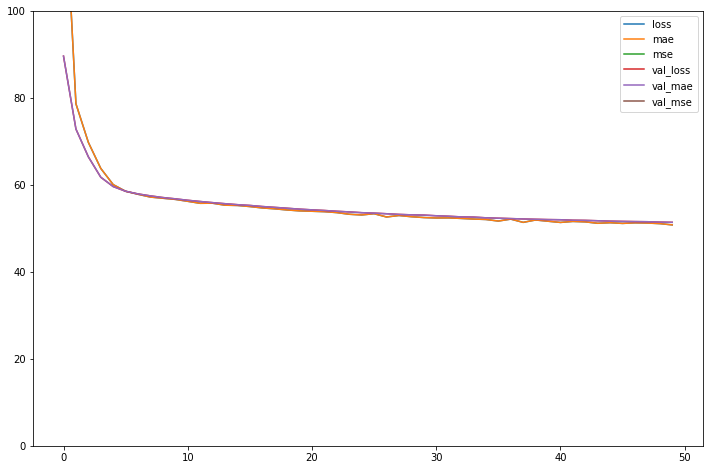

In [49]:
df = pd.DataFrame(history.history)
line = df.plot(kind='line', figsize=(12,8), ylim=(0,100))

Both the train MAE and validation MAE are still decreasing. This may indicate that the model is not optimally fitted to the dataset yet.

## 4 Layers

In [16]:
model3 = Sequential([
  Input(shape=(enc_X_train.shape[1],)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dense(1, kernel_initializer='glorot_uniform')
])

model3.compile(optimizer='Nadam', 
              loss='mae',
              metrics=['mae', 'mse'])

In [17]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                3392      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 15,937
Trainable params: 15,937
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model3.fit(
  enc_X_train, y_train,
  validation_data=(enc_X_val, y_val),
  steps_per_epoch=STEPS,
  batch_size=128,
  epochs=200)

Epoch 1/200
404/404 [==============================] - 3s 4ms/step - loss: 66.9377 - mae: 66.9377 - mse: 9721.1123 - val_loss: 54.5796 - val_mae: 54.5796 - val_mse: 6329.9351
Epoch 2/200
404/404 [==============================] - 1s 3ms/step - loss: 53.4807 - mae: 53.4807 - mse: 6224.8096 - val_loss: 53.2345 - val_mae: 53.2345 - val_mse: 6412.9990
Epoch 3/200
404/404 [==============================] - 1s 3ms/step - loss: 52.1700 - mae: 52.1700 - mse: 5963.9790 - val_loss: 52.8523 - val_mae: 52.8523 - val_mse: 6470.0142
Epoch 4/200
404/404 [==============================] - 1s 3ms/step - loss: 51.0253 - mae: 51.0253 - mse: 5756.9336 - val_loss: 50.8177 - val_mae: 50.8177 - val_mse: 5871.3926
Epoch 5/200
404/404 [==============================] - 1s 3ms/step - loss: 50.3369 - mae: 50.3369 - mse: 5635.8501 - val_loss: 50.4165 - val_mae: 50.4165 - val_mse: 5724.1260
Epoch 6/200
404/404 [==============================] - 1s 3ms/step - loss: 49.7461 - mae: 49.7461 - mse: 5517.1172 - val_loss

In [ ]:
y_pred = model3.predict(enc_X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_square = r2_score(y_test, y_pred)
print('\nMAE:', mae)
print('\nMSE:', mse)
print('\nRMSE:', rmse)
print('\nR2 Square', r2_square)

348/348 [==============================] - 1s 2ms/step

MAE: 47.735967513286056

MSE: 4984.470650485211

RMSE: 70.60078363931389

R2 Square 0.6102247477248153


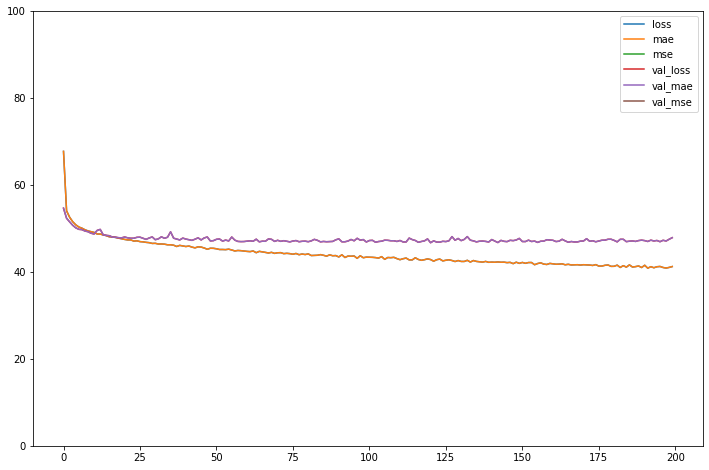

In [ ]:
df = pd.DataFrame(history.history)
line = df.plot(kind='line', figsize=(12,8), ylim=(0,100))

We observe a plateau-ing of the validation's MAE, while the training MAE still decreases (as expected). However, since we do not observe the validation MAE increasing yet, we have not hit the overfitting point yet.

## 8 Layer (with Dropout)

Although the optimal dropout proportion at each layer was determined to be 0, for risk of overfitting with 8 layers, we added a small proportion of dropout to the neural network's architecture.

In [ ]:
model4 = Sequential([
  Input(shape=(enc_X_train.shape[1],)),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(64, activation='relu', kernel_initializer='glorot_uniform', kernel_constraint=MaxNorm(2.0)),
  Dropout(0.1),
  Dense(1, kernel_initializer='glorot_uniform')
])

model4.compile(optimizer='Nadam', 
              loss='mae',
              metrics=['mae', 'mse'])

In [ ]:
model4.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 64)                3392      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 64)              

In [ ]:
history = model4.fit(
  enc_X_train, y_train,
  validation_data=(enc_X_val, y_val),
  steps_per_epoch=STEPS,
  batch_size=128,
  epochs=200)

Epoch 1/200
404/404 [==============================] - 7s 8ms/step - loss: 70.6537 - mae: 70.6537 - mse: 10430.0566 - val_loss: 63.2102 - val_mae: 63.2102 - val_mse: 8971.2832
Epoch 2/200
404/404 [==============================] - 2s 5ms/step - loss: 59.1364 - mae: 59.1364 - mse: 7364.5239 - val_loss: 65.7221 - val_mae: 65.7221 - val_mse: 9438.1748
Epoch 3/200
404/404 [==============================] - 2s 5ms/step - loss: 56.8465 - mae: 56.8465 - mse: 6911.2310 - val_loss: 71.1903 - val_mae: 71.1903 - val_mse: 10904.4697
Epoch 4/200
404/404 [==============================] - 2s 5ms/step - loss: 55.4038 - mae: 55.4038 - mse: 6640.9575 - val_loss: 72.9593 - val_mae: 72.9593 - val_mse: 11139.3027
Epoch 5/200
404/404 [==============================] - 3s 7ms/step - loss: 54.5617 - mae: 54.5617 - mse: 6459.8062 - val_loss: 72.2261 - val_mae: 72.2261 - val_mse: 11018.3193
Epoch 6/200
404/404 [==============================] - 3s 8ms/step - loss: 53.8779 - mae: 53.8779 - mse: 6322.1665 - val_

In [ ]:
y_pred = model4.predict(enc_X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2_square = r2_score(y_test, y_pred)
print('\nMAE:', mae)
print('\nMSE:', mse)
print('\nRMSE:', rmse)
print('\nR2 Square', r2_square)

348/348 [==============================] - 1s 2ms/step

MAE: 49.58255031334216

MSE: 5673.011213023441

RMSE: 75.31939466713365

R2 Square 0.5563823058119692


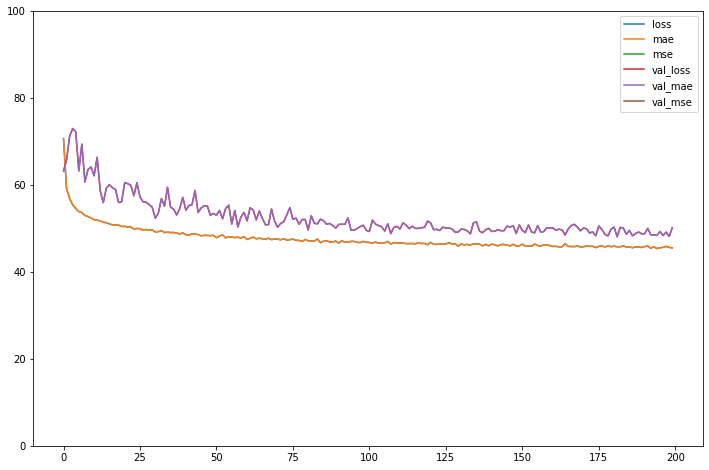

In [ ]:
df = pd.DataFrame(history.history)
line = df.plot(kind='line', figsize=(12,8), ylim=(0,100))

We observe a similar pattern to the graph obtained from a neural network with 4 layers, but more volatility in the validation MAE. This might be due to the introduction of the dropout layer.

We identify the neural network with 4 layers to have the best performance - it has a slightly higher MAE than the one with 2 layers (47.7 vs 47.3), but lower RMSE (70.6 vs 71.9). The neural network with 8 layers did not perform as well as the above 2 (MAE 49.6, RMSE 75.3).

# Explainability

With the optimal model identified, we will use external packages to explain the model's predictions. As the neural network is a "black box" model - there is no straightforward way to interpret it's predictions - we want to see what goes on behind the scenes, and how various feature values affect the prediction that our model makes.

In [22]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The first method of analysis is using SHAP values. SHAP values (SHapley Additive exPlanations) is a method based on cooperative game theory and used to increase transparency and interpretability of machine learning models.

As there is no native support for SHAP with keras' neural network, running the SHAP analysis on the whole train and test data would take too long. Hence, we use shap's in-built function to sample a subset of the train and test dataset to run the SHAP analysis on. 

The shap functions are supposed to choose a smaller sample that is still representative of the characteristics of the entire dataset, which should be enough for our analysis.

In [23]:
sampled_train = shap.sample(enc_X_train, 100)
sampled_test = shap.sample(enc_X_test, 50)
e = shap.KernelExplainer(model3, sampled_train, shap_explainer_type='GradientExplainer')
shap_values = e.shap_values(sampled_test)

  0%|          | 0/50 [00:00<?, ?it/s]

By analysing the model's prediction for a random data point, we see that certain factors like the host having a license, the bathroom type being a bath "pushing" the prediction higher, while other factors like the type of the room being a private room (instead of the whole house) "pushing" the value of the prediction lower.

In [24]:
shap.initjs()
features = enc_X_train.columns
shap.force_plot(e.expected_value[0], shap_values[0][0], features = features)

For a summary of the effect of the feature's on the model, we can see that features like accommodates, minimum_nights, the room_type being the top factors that affect the model's predictions.

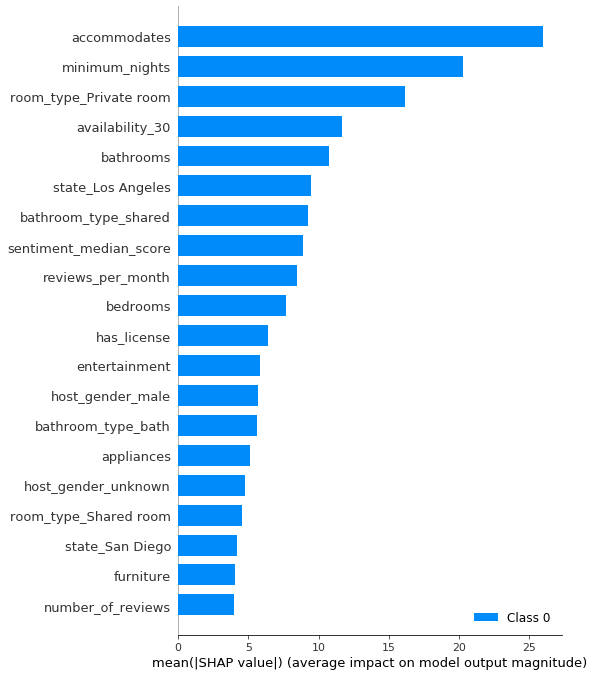

In [25]:
shap.summary_plot(shap_values, shap.sample(enc_X_test, 50), feature_names=features)

We also use another package, pdpbox, in order to further explain the model's predictions.

In [19]:
!pip install pdpbox
import pdpbox
from pdpbox import pdp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
pdp_room_type = pdp.pdp_isolate(model=model3, dataset=enc_X_train, model_features=enc_X_train.columns, feature=['room_type_Entire home/apt',	'room_type_Hotel room',	'room_type_Private room',	'room_type_Shared room'])

1620/1620 [==============================] - 2s 1ms/step


For one of the more influential categorical variables, room_type, we see that on aggregate, a hotel room listing would cost more than an apartment would, while private and shared rooms generally cause the model to predict a lower price. This seems logical, and ties in with our initial hypothesis.

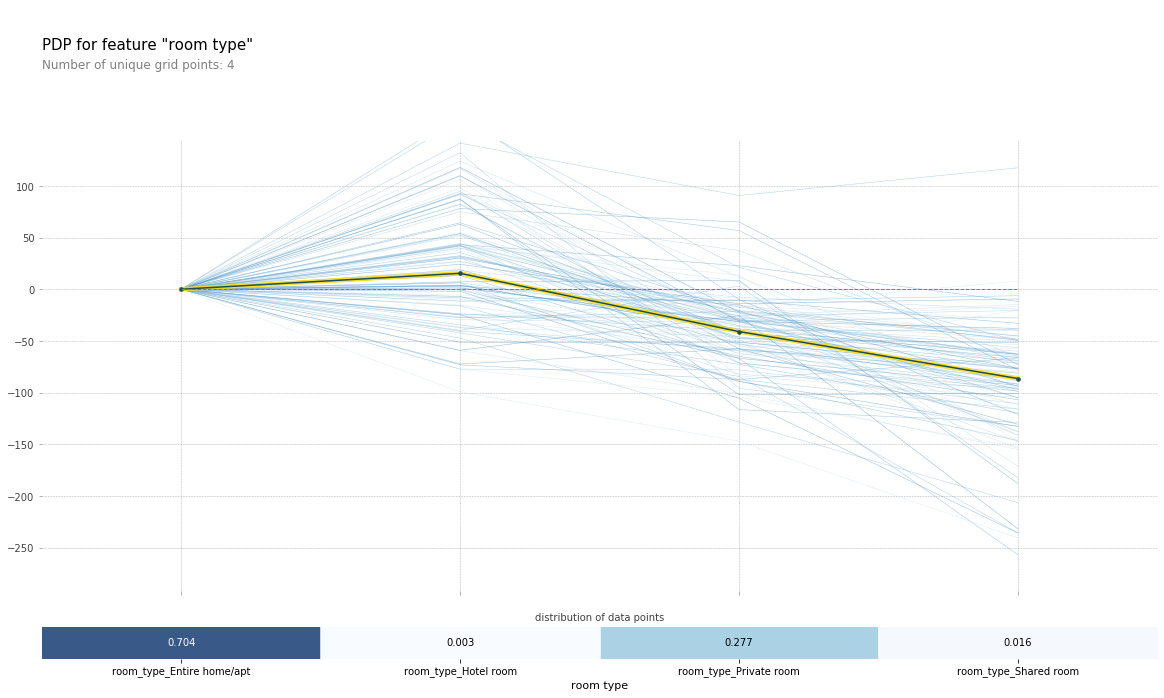

In [34]:
fig, axes = pdp.pdp_plot(pdp_room_type, 'room type', center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True, figsize=(20, 12))

In [29]:
pdp_state = pdp.pdp_isolate(model=model3, dataset=enc_X_train, model_features=enc_X_train.columns, feature=['state_Los Angeles',	'state_Oakland',	'state_Pacific Grove',	'state_San Diego',	'state_San Francisco',	'state_San Mateo County',	'state_Santa Clara County',	'state_Santa Cruz County'])

1620/1620 [==============================] - 2s 1ms/step


We also analyse how the state affects the price predicted by the model, and can see that listings based in Pacific Grove cause the model to predict a higher value for price.

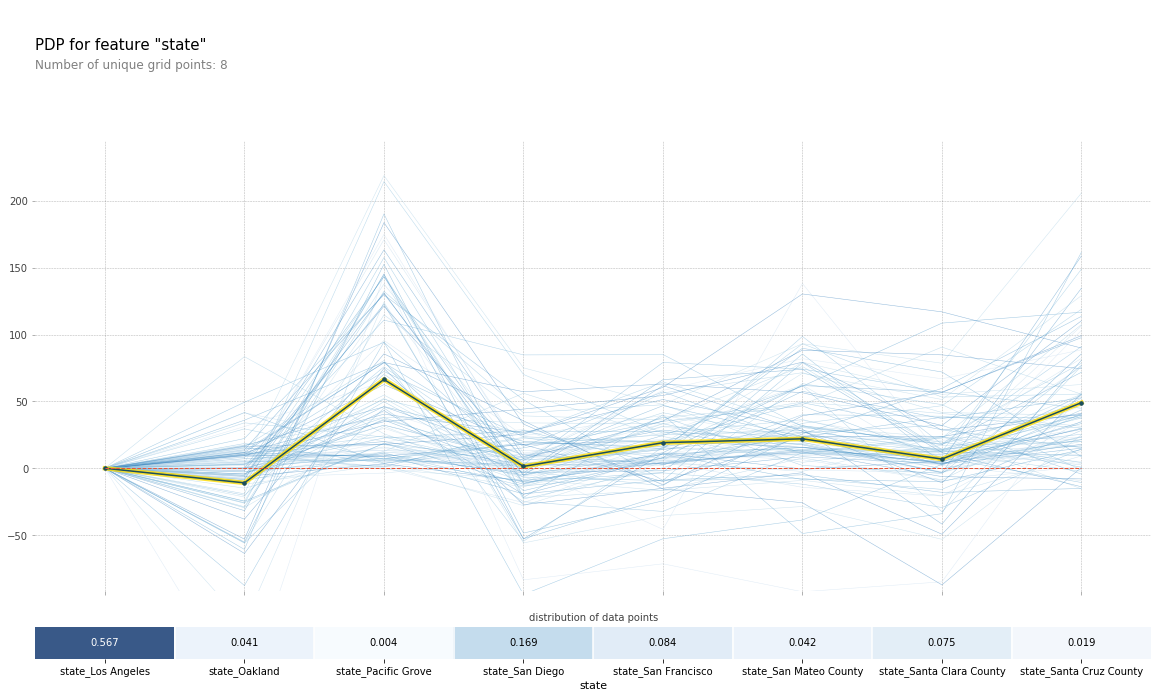

In [32]:
fig, axes = pdp.pdp_plot(pdp_state, 'state', center=True, plot_lines=True, frac_to_plot=100, plot_pts_dist=True, figsize=(20,12))